<a href="https://colab.research.google.com/github/HamiltonLROliveira/ciencia_dados_puc_rj/blob/main/analise_exploratoria_passagens_aereas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [20]:
# Informa a URL de importação do dataset
#url = "https://raw.githubusercontent.com/tatianaesc/datascience/main/diabetes.csv"
# Lê o arquivo
dataset = pd.read_csv("../RJ-BSB_Ago2023.csv", encoding='latin1', on_bad_lines = 'warn', sep='|')

In [21]:
# Mostra as dimensões do dataset
dataset.shape

(1024, 4)

In [22]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Identificador do processo de viagem  1024 non-null   int64  
 1   Viagem Urgente                       1024 non-null   object 
 2   Nome do órgão superior               1024 non-null   object 
 3   Valor_passagem                       1024 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.1+ KB


In [23]:
dataset['Identificador do processo de viagem'] = dataset['Identificador do processo de viagem'].astype(str)

In [24]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,Identificador do processo de viagem,Viagem Urgente,Nome do órgão superior,Valor_passagem
0,19191275,NÃO,Sem informação,1394.81
1,19146675,SIM,Ministério do Planejamento e Orçamento,499.89
2,19146755,NÃO,Ministério da Educação,1014.19
3,19117637,SIM,Ministério da Saúde,2257.67
4,19117716,SIM,Ministério da Saúde,2471.07
5,19226133,SIM,Ministério do Planejamento e Orçamento,3150.22
6,19179060,SIM,Ministério dos Direitos Humanos e Cidadania,2884.29
7,19179081,NÃO,Ministério da Educação,1361.09
8,19136953,SIM,Presidência da República,2163.58
9,19136975,NÃO,Ministério da Saúde,443.77


In [25]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,Identificador do processo de viagem,Viagem Urgente,Nome do órgão superior,Valor_passagem
1014,18985896,SIM,Sem informação,731.52
1015,19183503,SIM,Sem informação,1327.60
1016,19184378,SIM,Ministério de Minas e Energia,2302.19
1017,19173085,SIM,Ministério de Minas e Energia,2101.81
1018,19152668,SIM,Ministério da Saúde,1303.19
1019,19143928,SIM,Ministério dos Direitos Humanos e Cidadania,1150.56
1020,19164683,SIM,Sem informação,2364.34
1021,19155431,SIM,Sem informação,634.71
1022,19177667,SIM,"Ministério do Desenvolvimento, Indústria, Comé...",853.19
1023,19156732,SIM,Presidência da República,2018.19


In [26]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()
#fazer media para cada categoria urgente/nao urgente como indicativo

,Valor_passagem
count,1024.000000
mean,1752.665908
std,1023.188117
min,0.010000
25%,860.322500
50%,1642.690000
75%,2326.190000
max,5855.480000


In [27]:
# Verifica a distribuição das classes
dataset.groupby('Nome do órgão superior').size()

Nome do órgão superior
Advocacia-Geral da União                                          12
Ministério da Agricultura e Pecuária                              12
Ministério da Ciência, Tecnologia e Inovação                       6
Ministério da Cultura                                             36
Ministério da Defesa                                              82
Ministério da Educação                                           105
Ministério da Fazenda                                             12
Ministério da Gestão e da Inovação em Serviços Públicos            5
Ministério da Integração e do Desenvolvimento Regional             1
Ministério da Justiça e Segurança Pública                          2
Ministério da Previdência Social                                  18
Ministério da Saúde                                              160
Ministério das Comunicações                                       17
Ministério das Relações Exteriores                                19
Ministério 

In [28]:
dataset.loc[dataset["Viagem Urgente"] == "SIM", "Viagem Urgente"] = 1

In [29]:
dataset.loc[dataset["Viagem Urgente"] == "NÃO", "Viagem Urgente"] = 0

In [30]:
dataset['Viagem Urgente'] = dataset['Viagem Urgente'].astype(int)

In [31]:
dataset.corr(method = 'pearson')

,Viagem Urgente,Valor_passagem
Viagem Urgente,1.000000,0.285417
Valor_passagem,0.285417,1.000000


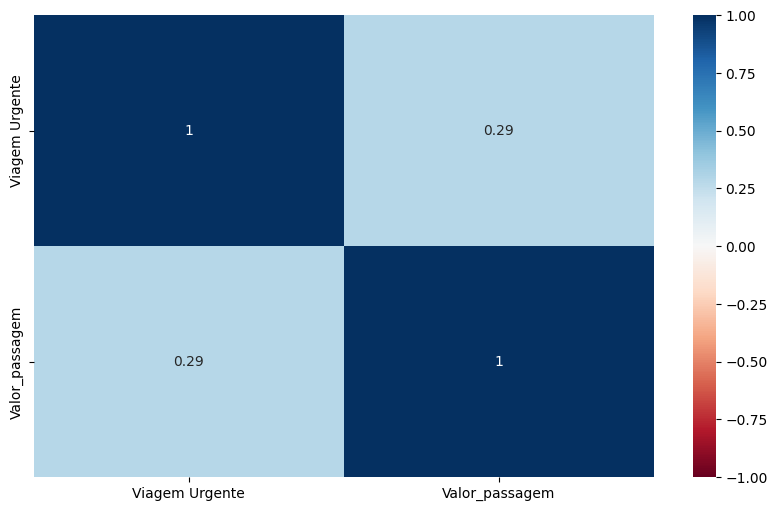

In [32]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

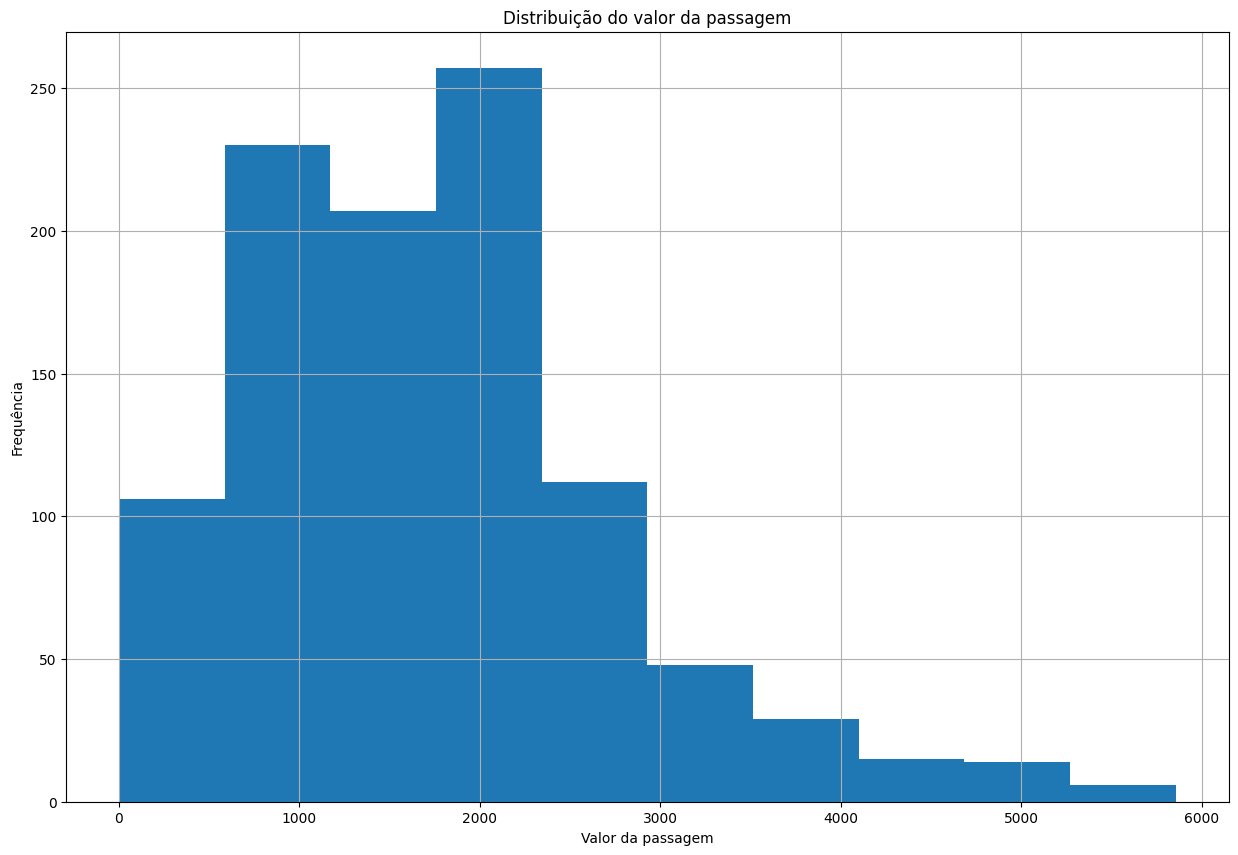

In [33]:
# Histograma
dataset['Valor_passagem'].hist(figsize = (15,10))

# incluindo título do gráfico e legenda
plt.title('Distribuição do valor da passagem')
plt.ylabel('Frequência')
plt.xlabel('Valor da passagem');
plt.show()

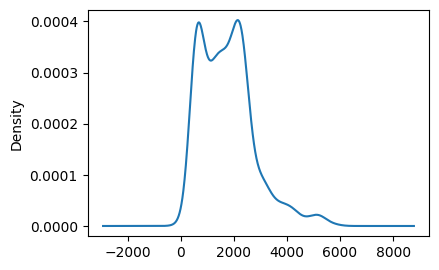

In [35]:
# Density Plot
dataset['Valor_passagem'].plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

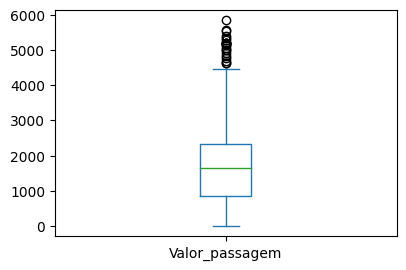

In [36]:
# Boxplot
dataset['Valor_passagem'].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

#explorar outliers. Desmembrar em viagem urgente/não urgente

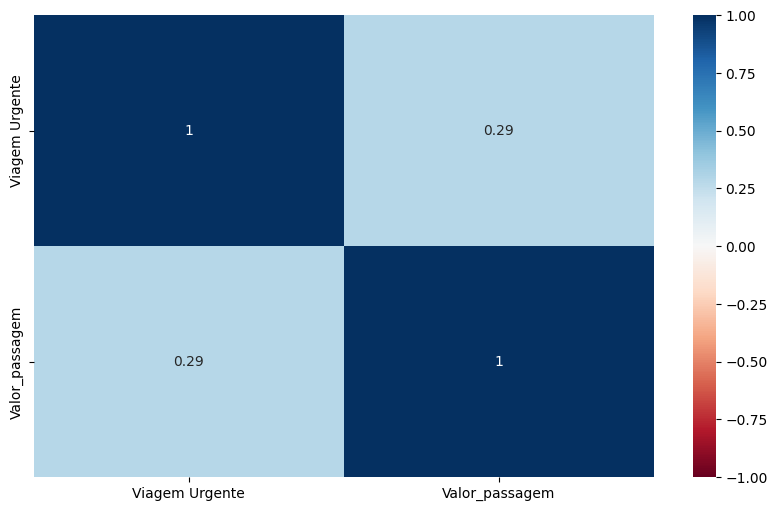

In [37]:

# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

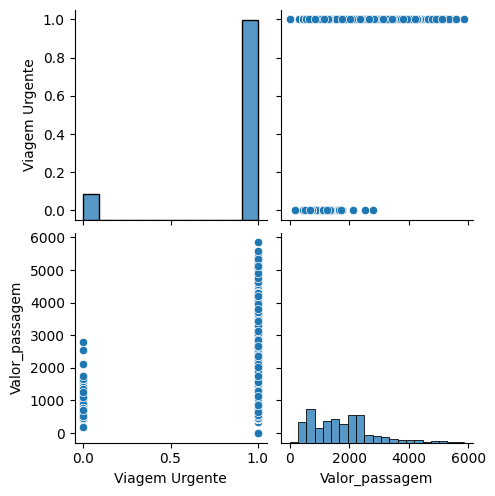

In [38]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset)

In [39]:
dataset.groupby('Nome do órgão superior').size()

Nome do órgão superior
Advocacia-Geral da União                                          12
Ministério da Agricultura e Pecuária                              12
Ministério da Ciência, Tecnologia e Inovação                       6
Ministério da Cultura                                             36
Ministério da Defesa                                              82
Ministério da Educação                                           105
Ministério da Fazenda                                             12
Ministério da Gestão e da Inovação em Serviços Públicos            5
Ministério da Integração e do Desenvolvimento Regional             1
Ministério da Justiça e Segurança Pública                          2
Ministério da Previdência Social                                  18
Ministério da Saúde                                              160
Ministério das Comunicações                                       17
Ministério das Relações Exteriores                                19
Ministério 

In [40]:
dataset.loc[dataset["Nome do órgão superior"] == "Sem informação", 'Sigla']  = 'SI'
dataset.loc[dataset["Nome do órgão superior"] == "Advocacia-Geral da União", 'Sigla']  = 'AGU'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Agricultura e Pecuária", 'Sigla']  = 'MAPA'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Ciência, Tecnologia e Inovação", 'Sigla']  = 'MCTI'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Cultura", 'Sigla']  = 'MinC'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Defesa", 'Sigla']  = 'MD'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Educação", 'Sigla']  = 'ME'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Fazenda", 'Sigla']  = 'MF'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Gestão e da Inovação em Serviços Públicos", 'Sigla']  = 'AGU'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Integração e do Desenvolvimento Regional", 'Sigla']  = 'MIDR'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Justiça e Segurança Pública", 'Sigla']  = 'MJSP'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Previdência Social", 'Sigla']  = 'MPS'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério da Saúde", 'Sigla']  = 'MS'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério das Comunicações", 'Sigla']  = 'MCOM'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério das Relações Exteriores", 'Sigla']  = 'MRE'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério de Minas e Energia", 'Sigla']  = 'MME'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério do Desenvolvimento Agrário e Agricultura Familiar", 'Sigla']  = 'MD'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério do Desenvolvimento, Indústria, Comércio e Serviços", 'Sigla']  = 'MDIC'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério do Meio Ambiente e Mudança do Clima", 'Sigla']  = 'MMA'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério do Planejamento e Orçamento", 'Sigla']  = 'MPO'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério do Turismo", 'Sigla']  = 'MTUR'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério dos Direitos Humanos e Cidadania", 'Sigla']  = 'MDHC'
dataset.loc[dataset["Nome do órgão superior"] == "Presidência da República", 'Sigla']  = 'PR'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério dos Transportes", 'Sigla']  = 'MTOP'
dataset.loc[dataset["Nome do órgão superior"] == "Ministério dos Povos Indígenas", 'Sigla']  = 'MPI'

In [41]:
df_eixos = dataset.groupby(["Nome do órgão superior",'Sigla']).size().to_frame()

In [42]:
siglas = []
orgaos = []
for x in range(0, len(df_eixos.index)):
  siglas.append(df_eixos.index[x][1])
  orgaos.append(df_eixos.index[x][0])

In [43]:
df_eixos = df_eixos.reset_index(drop=True)

In [44]:
df_eixos.columns = ["Qtde"]

In [45]:
df_eixos.insert(0, "órgão superior", orgaos)

In [46]:
df_eixos.insert(1, "Sigla", siglas)

In [47]:
df_eixos

,órgão superior,Sigla,Qtde
0,Advocacia-Geral da União,AGU,12
1,Ministério da Agricultura e Pecuária,MAPA,12
2,"Ministério da Ciência, Tecnologia e Inovação",MCTI,6
3,Ministério da Cultura,MinC,36
4,Ministério da Defesa,MD,82
5,Ministério da Educação,ME,105
6,Ministério da Fazenda,MF,12
7,Ministério da Gestão e da Inovação em Serviços...,AGU,5
8,Ministério da Integração e do Desenvolvimento ...,MIDR,1
9,Ministério da Justiça e Segurança Pública,MJSP,2


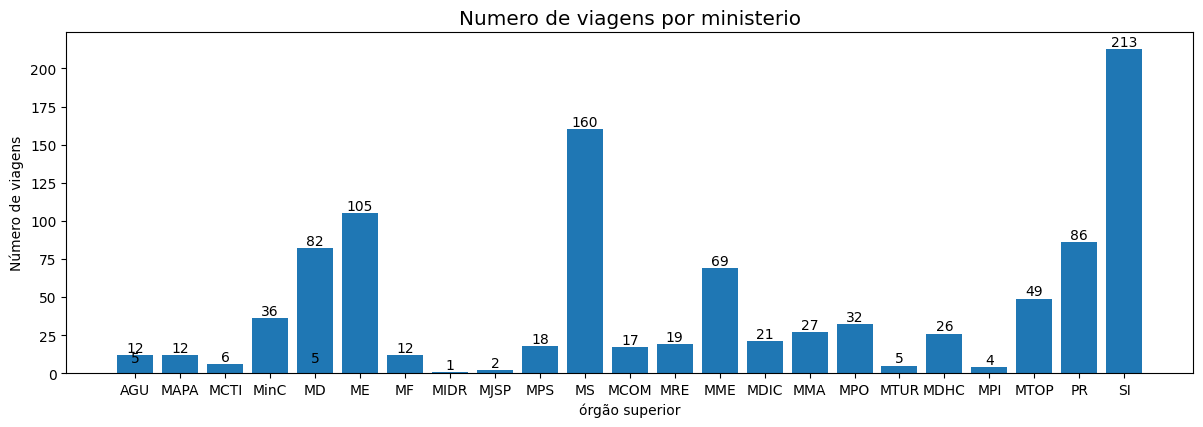

In [48]:
# criando o gráfico de barras
fig, ax = plt.subplots(figsize = (12,4))
plt.style.use("ggplot")
plt.rc("axes", facecolor="#D3D3D3", grid = True)
plt.rc("grid", color="#FFFFFF")
plt.tight_layout()
plt.bar(df_eixos["Sigla"], df_eixos["Qtde"])
ax.bar_label(ax.containers[0])
plt.title("Numero de viagens por ministerio")
plt.xlabel("órgão superior")
plt.ylabel("Número de viagens");
plt.show()

In [49]:
plt.savefig("grafico_barras.pdf")
plt.savefig("grafico_barras.svg")

<Figure size 640x480 with 0 Axes>

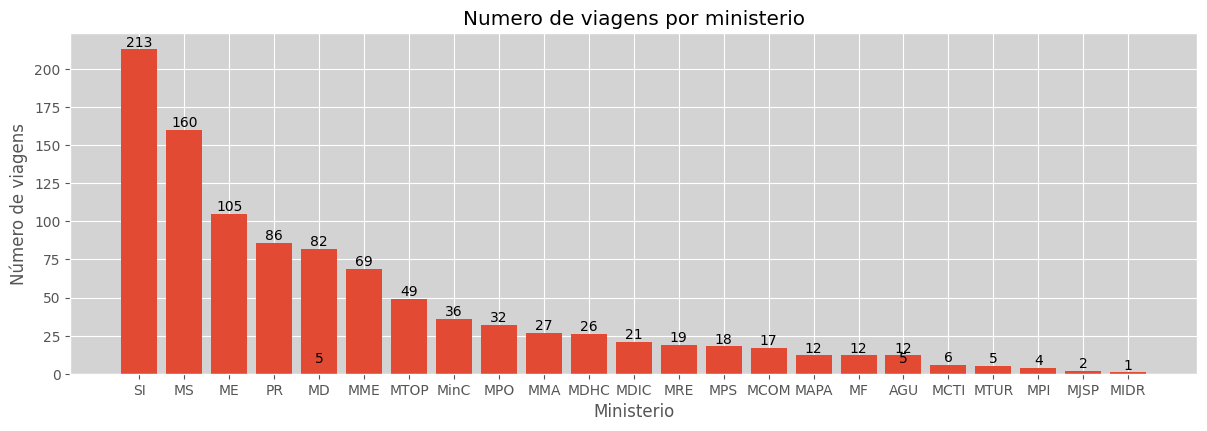

In [50]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=False)
fig, ax = plt.subplots(figsize = (12,4))
plt.tight_layout()
plt.bar(df_eixos_ordem_qtde["Sigla"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.title("Numero de viagens por ministerio")
plt.xlabel("Ministerio")
plt.ylabel("Número de viagens");
plt.show()

#detalhar analise do SI

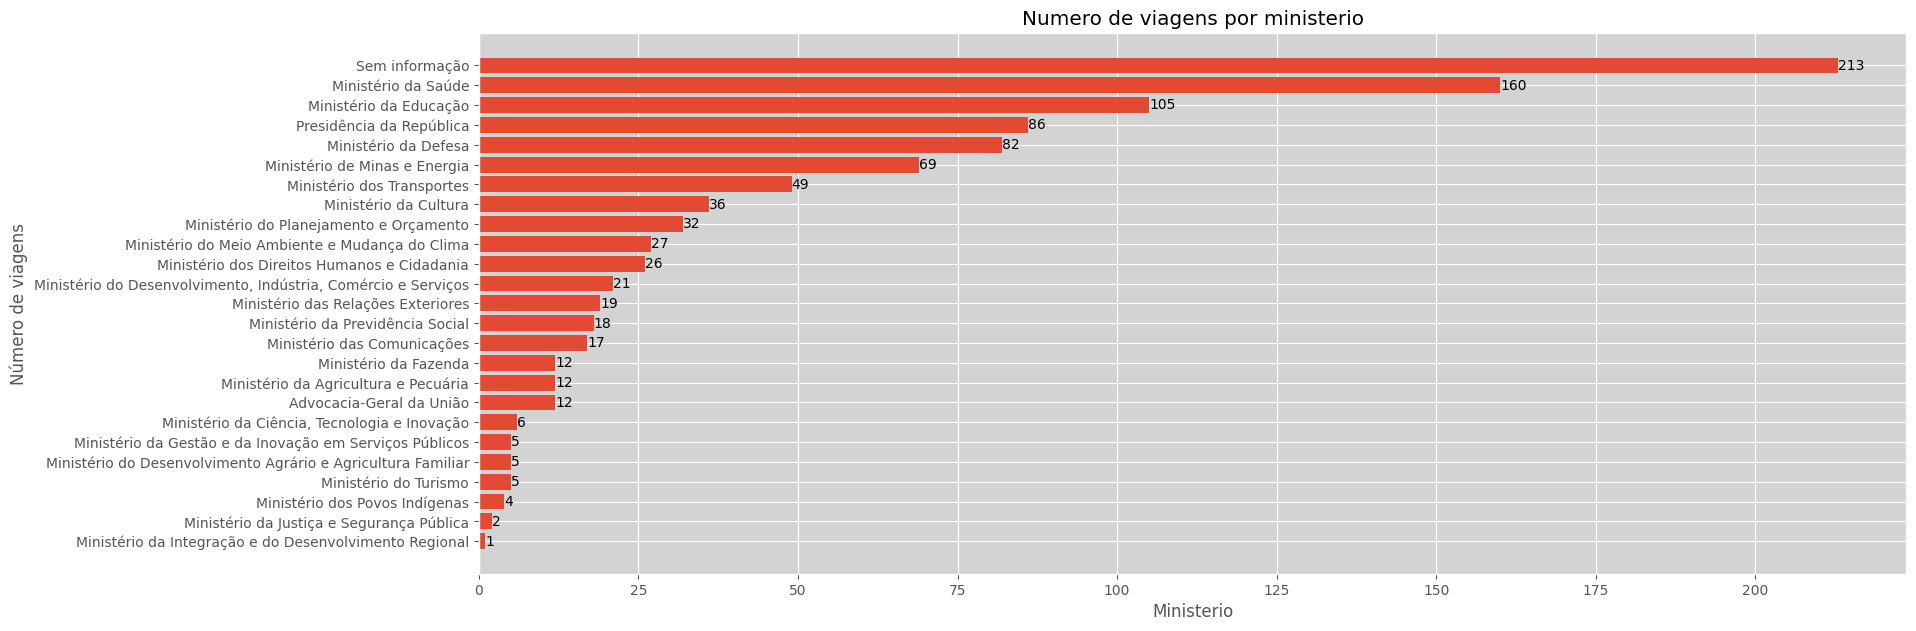

In [51]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Qtde"] , ascending=True)
fig, ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.title("Numero de viagens por ministerio")
plt.xlabel("Ministerio")
plt.ylabel("Número de viagens");
plt.show()

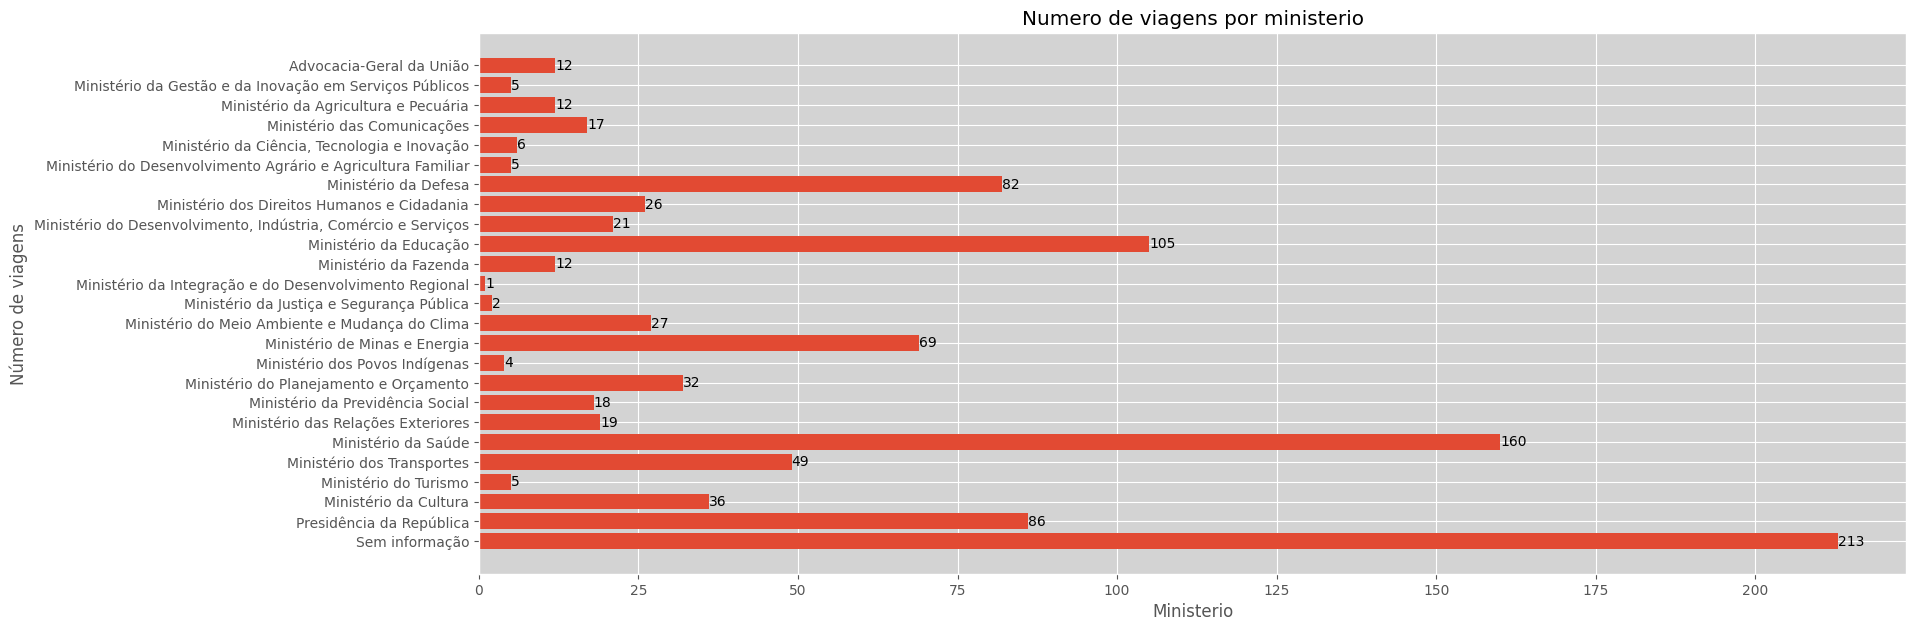

In [52]:
# criando o gráfico de barras
df_eixos_ordem_qtde = df_eixos.sort_values(["Sigla"] , ascending=False)
fig, ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
plt.barh(df_eixos_ordem_qtde["órgão superior"], df_eixos_ordem_qtde["Qtde"])
ax.bar_label(ax.containers[0])
plt.title("Numero de viagens por ministerio")
plt.xlabel("Ministerio")
plt.ylabel("Número de viagens");
plt.show()